In [38]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
from pandas import DataFrame
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import leastsq 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
d =[[1, 0.000003, 0.000003],
    [10, 0.000003, 0.000003],
    [100, 0.000003, 0.000004],
    [1000, 0.000005, 0.000011],
    [10000, 0.000023, 0.000083],
    [100000, 0.000203, 0.000803],
    [1000000, 0.002026, 0.008032],
    [10000000, 0.020057, 0.083567],
    [100000000, 0.203523, 0.835881],
    [1000000000, 2.050905, 8.041809]]

df0 = DataFrame(d, columns=["count","long","longlong"])
df0


,count,long,longlong
0,1,0.000003,0.000003
1,10,0.000003,0.000003
2,100,0.000003,0.000004
3,1000,0.000005,0.000011
4,10000,0.000023,0.000083
5,100000,0.000203,0.000803
6,1000000,0.002026,0.008032
7,10000000,0.020057,0.083567
8,100000000,0.203523,0.835881
9,1000000000,2.050905,8.041809


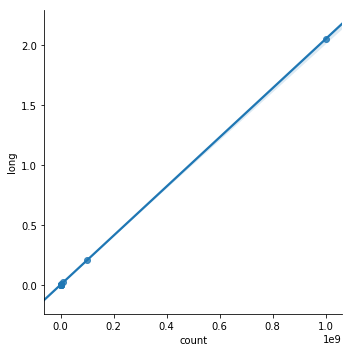

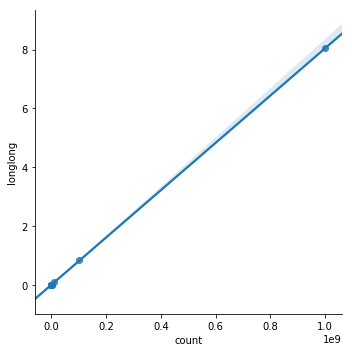

In [30]:
sns.lmplot("count","long",data=df0)
sns.lmplot("count","longlong",data=df0)

In [98]:
count = np.array(df0["count"])[4:10]
long = np.array(df0["long"])[4:10]
longlong = np.array(df0["longlong"])[4:10]

In [92]:
def func(x, a1, a2):
    return a1 +a2*x

def fit_func(param, x, y):
    a1, a2 = param
    residual = (y - func(x, a1, a2))
    return residual

b1     : -0.0004947644129985178
b2     : 2.051289552754018e-09
reduced_chi_square : 3.0366524438028292e-09


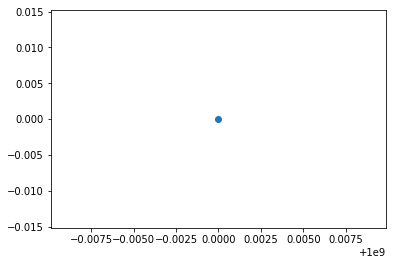

In [94]:
param = [0, 0]
result = leastsq(fit_func, param, args=(count, long), full_output=True)

b1, b2 = result[0]
#b1_err = np.sqrt(result[1][0, 0])
#b2_err = np.sqrt(result[1][1, 1])

print("b1     : "+ str(b1))
#print("b1_err : " + str(b1_err))
print("b2     : "+ str(b2))
#print("b2_err : "+ str(b2_err))

chi = fit_func((b1, b2), count[4:10], long[4:10])
plt.scatter(count[4:10], chi*chi)

chi_square = sum(chi*chi)
print("reduced_chi_square : " + str(chi_square /4) )

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


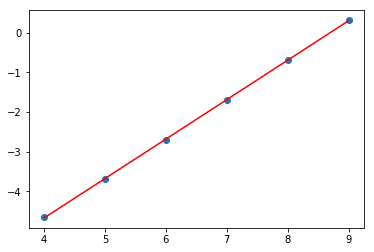

In [106]:
count = np.array(df0["count"])[4:10]
long = np.array(df0["long"])[4:10]
longlong = np.array(df0["longlong"])[4:10]

# Xを[X 1]の形にします。
X = np.log10(count)
X = np.array( [ [value,1] for value in X ])
Y_1 = np.log10(long)
# 最小二乗法の計算を実行します。
a, b = np.linalg.lstsq(X, Y_1)[0]

# まずは元のデータをプロットします。# まずは元のデータ
X = np.log10(count)
plt.plot(X,Y_1,'o')

# 求めた回帰直線を描きます。
x= np.log10(count)
plt.plot(x, a*x + b,'r')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


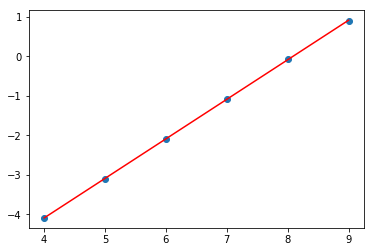

In [116]:
count = np.array(df0["count"])[4:10]
long = np.array(df0["long"])[4:10]
longlong = np.array(df0["longlong"])[4:10]

# Xを[X 1]の形にします。
X = np.log10(count)
X = np.array( [ [value,1] for value in X ])
Y_1 = np.log10(longlong)
# 最小二乗法の計算を実行します。
c, d = np.linalg.lstsq(X, Y_1)[0]

# まずは元のデータをプロットします。# まずは元のデータ
X = np.log10(count)
plt.plot(X,Y_1,'o')

# 求めた回帰直線を描きます。
x= np.log10(count)
plt.plot(x, c*x + d,'r')

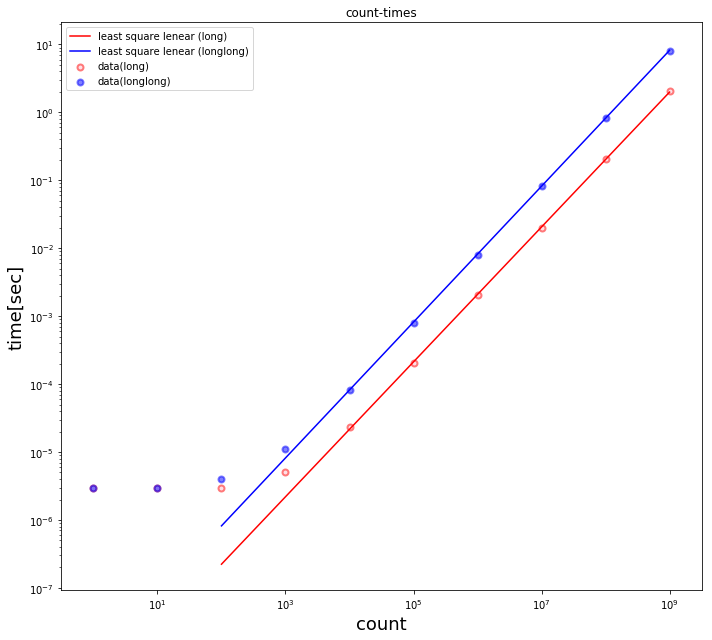

In [136]:
count = np.array(df0["count"])
long = np.array(df0["long"])
longlong = np.array(df0["longlong"])

fig = plt.figure(figsize=(10, 9))
ax1 =fig.add_subplot(1,1,1)

#plot_Pb
ax1.set_title("count-times")
ax1.set_xlabel("count",fontsize=18)
ax1.set_ylabel("time[sec]",fontsize=18)
ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.scatter(count, long ,c="pink", alpha=0.5, linewidths="2",edgecolors="red",label="data(long)")
ax1.scatter(count, longlong,c="blue", alpha=0.5, linewidths="2",edgecolors="blue",label="data(longlong)")
#ax1.set_xlim(0.1,10000000000)
#ax1.set_ylim(0.000001,10000000000)

#ax1.plot(x, a*x + b,label="f(x)")
x= np.linspace(2,9)
ax1.plot(pow(10,x), pow(10,a*x + b),'r',label="least square lenear (long)")
ax1.plot(pow(10,x), pow(10,c*x + d),'b',label="least square lenear (longlong)")
ax1.legend()

fig.tight_layout()
plt.savefig("fig2.eps")
#plt.show()

In [131]:
count = np.array(df0["count"])[4:10]
long = np.array(df0["long"])[4:10]
longlong = np.array(df0["longlong"])[4:10]

# Xを[X 1]の形にします。
X = count
X = np.array( [ [value,1] for value in X ])
Y_1 = long
# 最小二乗法の計算を実行します。
a1, b1 = np.linalg.lstsq(X, Y_1)[0]

a1,b1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


(2.051175075620274e-09, -0.0003906897120737532)

In [132]:
count = np.array(df0["count"])[4:10]
long = np.array(df0["long"])[4:10]
longlong = np.array(df0["longlong"])[4:10]

# Xを[X 1]の形にします。
X = count
X = np.array( [ [value,1] for value in X ])
Y_1 = longlong
# 最小二乗法の計算を実行します。
c1, d1 = np.linalg.lstsq(X, Y_1)[0]

c1,d1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


(8.037767839220752e-09, 0.006555129360571571)